Building a fashion recommendation system using image features involves several key steps, leveraging both computer vision and machine learning techniques. Below is a detailed process you can follow to build a fashion recommendation system using image features:

* Assemble a diverse dataset of fashion items. This dataset should include a wide variety of items with different colours, patterns, styles, and categories.
* Ensure all images are in a consistent format (e.g., JPEG, PNG) and resolution.
* Implement a preprocessing function to prepare images for feature extraction.
* Choose a pre-trained CNN model such as VGG16, ResNet, or InceptionV3. These models, pre-trained on large datasets like ImageNet, are capable of extracting powerful feature representations from images.
* Pass each image through the CNN model to extract features.
* Define a metric for measuring the similarity between feature vectors. 
* Rank the dataset images based on their similarity to the input image and recommend the top N items that are most similar.
* Implement a final function that encapsulates the entire process from pre-processing an input image, extracting features, computing similarities, and outputting recommendations.

In [1]:
from zipfile import ZipFile
import os

In [2]:
import os
from zipfile import ZipFile, BadZipFile

zip_file_path = 'women-fashion.zip'
extraction_directory = 'women_fashion'

# Ensure the extraction directory exists
os.makedirs(extraction_directory, exist_ok=True)

try:
    with ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            # Skip the __MACOSX directory and any hidden files
            if not member.startswith('__MACOSX') and not os.path.basename(member).startswith('._'):
                try:
                    zip_ref.extract(member, extraction_directory)
                except FileNotFoundError as e:
                    print(f"FileNotFoundError: {e}")
                except OSError as e:
                    print(f"OSError: {e}")
except BadZipFile:
    print("Error: Bad zip file")

# List extracted files
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])


FileNotFoundError: [Errno 2] No such file or directory: 'women_fashion\\women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg'
FileNotFoundError: [Errno 2] No such file or directory: 'women_fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'
['women fashion', '__MACOSX']


In [3]:
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg',
  'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
  'black dress with lace detailing.jpg',
  'black dress with sparkling details.jpg'],
 94)

Looking the first image in the file

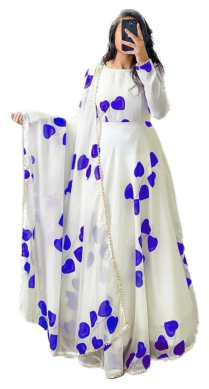

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

#function to load and display image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

#display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated,extracted_files_updated[0])
display_image(first_image_path)

Creating a list of all image

In [5]:
import glob

#directory path containing your images
image_directory = 'women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

#print the list of image file paths
print(image_paths_list)

['women_fashion/women fashion\\Anarkali suit with a modern twist.jpg', 'women_fashion/women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'women_fashion/women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'women_fashion/women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'women_fashion/women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'women_fashion/women fashion\\beige top adorned with black dots and a green skirt.jpg', 'women_fashion/women fashion\\black and white gingham checkered A-line dress with a flared skirt.jpg', 'women_fashion/women fashion\\black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg', 'women_fashion/women fashion\\black dress with lace detailing.jpg', 'women_fashion/women fashion\\black dress with sparkling details.jpg', 'women_fashion/women fashion\\black flora

In the above code, the glob module is used to generate a list of file paths for images stored in the directory. The glob.glob function searches for files that match a specified pattern, in this case, *.*, which matches all files within the directory. The list comprehension then filters these files to include only those with specific image file extensions (.jpg, .png, .jpeg, .webp).

extracting the features from all the fashion images

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from PIL import Image
import os

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In the above code, a feature extraction process is implemented using the VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list.

a function to recommend fashion images based on image features:

In [7]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # Pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the inout image index from similar_indices
    similar_indices = [idx for idx in similar_indices if all_image_names[idx] != os.path.basename(input_image_path)]
    
    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title('Input Image')
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f'Recommendation {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In the above code, we defined a function recommend_fashion_items_cnn, which recommends fashion items similar to a given input image using deep learning-based feature extraction. It utilizes the VGG16 model to extract high-dimensional feature vectors from images, capturing their visual essence

For a specified input image, the function preprocesses the image, extracts its features, and calculates the cosine similarity between this feature vector and those of other images in the dataset (all_features). It ranks these images based on similarity and selects the top N most similar images to recommend, explicitly excluding the input image from being recommended to itself by filtering out its index from the list of similar indices.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


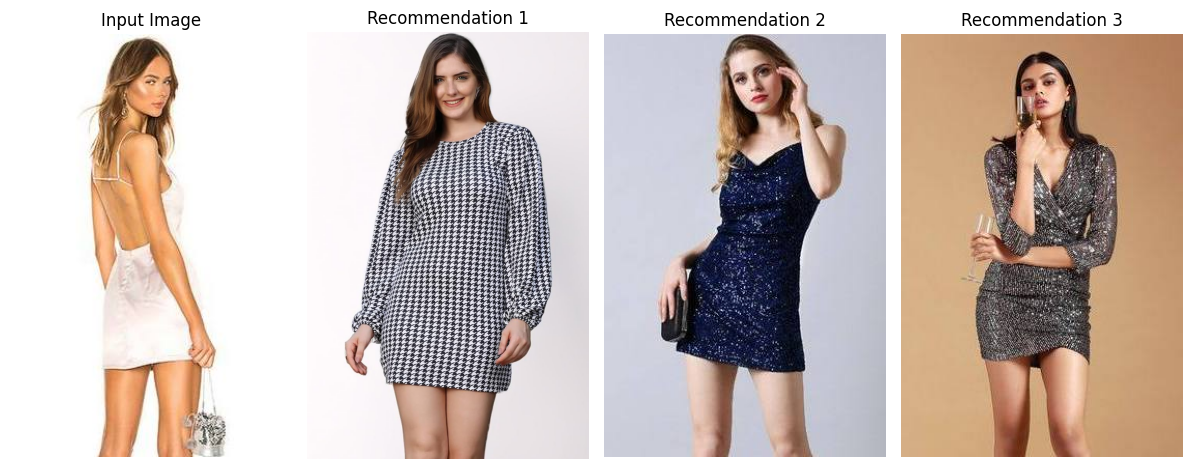

In [11]:
input_image_path = 'women_fashion/women fashion/short, white, sleeveless dress with thin straps.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)